In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import mysql.connector
import numpy as np

db = mysql.connector.connect(host = "localhost",
                            username = "root",
                             password = "fenil2331",
                             database = "ecommerce")

cur = db.cursor()


# List all unique cities where customers are located. 

In [2]:
query = """ select distinct customer_city from customers """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data,columns = ["States"])
df.head()

,States
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


# Count the number of orders placed in 2017. 


In [3]:
query = """ select count(order_id) from orders where year(order_purchase_timestamp) = 2017 """

cur.execute(query)

data = cur.fetchall()

"total orders placed in 2017 are", data[0][0]

('total orders placed in 2017 are', 45101)

# Find the total sales per category(High) 


In [4]:
query = """ select upper(products.product_category_name) category,
round(sum(payments.payment_value),2) sales 
from payments join order_items
on payments.order_id = order_items.order_id
join products
on products.product_id = order_items.product_id
group by category 
order by sales desc
limit 10 """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Category","Sales"])
df

,Category,Sales
0,CAMA_MESA_BANHO,1712553.67
1,BELEZA_SAUDE,1657373.12
2,INFORMATICA_ACESSORIOS,1585330.45
3,MOVEIS_DECORACAO,1430176.39
4,RELOGIOS_PRESENTES,1429216.68
5,ESPORTE_LAZER,1392127.56
6,UTILIDADES_DOMESTICAS,1094758.13
7,AUTOMOTIVO,852294.33
8,FERRAMENTAS_JARDIM,838280.75
9,COOL_STUFF,779698.00


# Find the total sales per category (Low) 


In [5]:
query = """ select upper(products.product_category_name) category,
round(sum(payments.payment_value),2) sales 
from payments join order_items
on payments.order_id = order_items.order_id
join products
on products.product_id = order_items.product_id
group by category 
order by sales 
limit 10 """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Category","Sales"])
df

,Category,Sales
0,SEGUROS_E_SERVICOS,324.51
1,FASHION_ROUPA_INFANTO_JUVENIL,785.67
2,CDS_DVDS_MUSICAIS,1199.43
3,CASA_CONFORTO_2,1710.54
4,PC_GAMER,2174.43
5,FLORES,2213.01
6,ARTES_E_ARTESANATO,2326.17
7,LA_CUISINE,2913.53
8,FASHION_ESPORTE,3645.92
9,FRALDAS_HIGIENE,4221.25


# Calculate the percentage of orders that were paid in installments. 


In [6]:
query = """ SELECT 
(SUM(CASE WHEN payment_installments >= 1 THEN 1 ELSE 0 END))/COUNT(*)*100
FROM payments """

cur.execute(query)

data = cur.fetchall()

"the percentage of orders that were paid in installments is",data[0][0]

('the percentage of orders that were paid in installments is',
 Decimal('99.9981'))

# Count the number of customers from each state. 

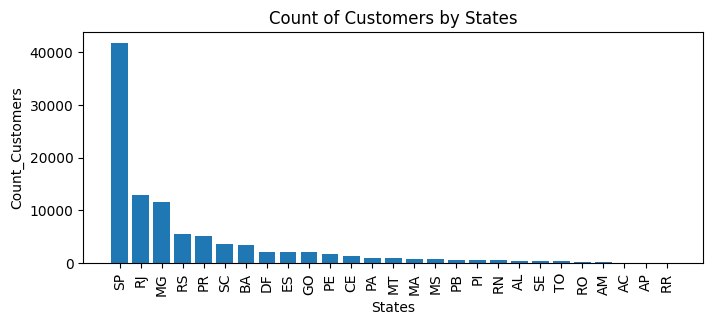

In [7]:
query = """ select customer_state, count(customer_id) from customers 
group by customer_state """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data,columns = ["State" , "Customers_count"])
df = df.sort_values(by = "Customers_count", ascending= False)
plt.figure(figsize = (8,3))
plt.bar(df["State"],df["Customers_count"])
plt.xticks (rotation = 90)
plt.xlabel("States")
plt.ylabel("Count_Customers")
plt.title("Count of Customers by States")

plt.show()

# Intermediate Queries 

# Calculate the number of orders per month in 2018. 


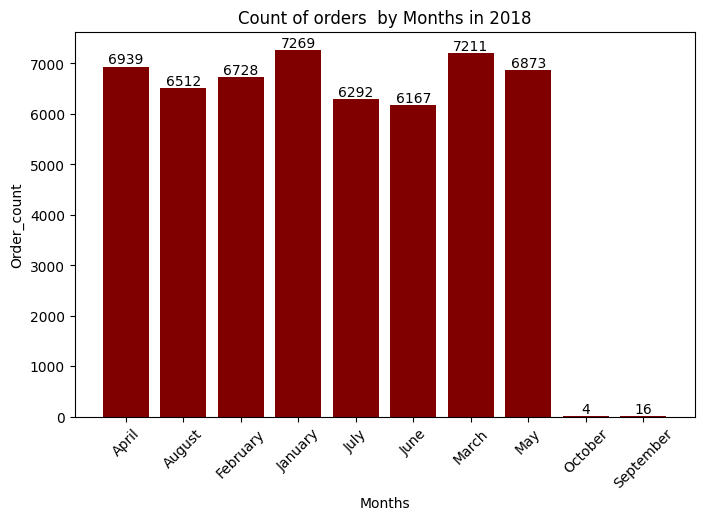

In [8]:
query = """ SELECT monthname(order_purchase_timestamp) months,count(order_id) order_count
from  orders where year(order_purchase_timestamp) = 2018 
group by months """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data,columns =["Months" , "Order_count"])
df = df.sort_values(by = "Months", ascending= True)
plt.figure(figsize = (8,5))
o = plt.bar(df["Months"],df["Order_count"],color = "maroon")
plt.xticks (rotation = 45)
plt.xlabel("Months")
plt.ylabel("Order_count")
plt.title("Count of orders  by Months in 2018")
plt.bar_label(o)
plt.show()


# Find the average number of products per order, grouped by customer city. 

In [9]:
query = """ SELECT 
    order_summary.customer_city,
    ROUND(AVG(order_summary.order_count), 2) AS avg_products_per_order
FROM (
    SELECT 
        o.order_id,
        c.customer_city,
        COUNT(oi.product_id) AS order_count
    FROM orders o
    JOIN customers c 
        ON o.customer_id = c.customer_id
    JOIN order_items oi 
        ON o.order_id = oi.order_id
    GROUP BY o.order_id, c.customer_city
) AS order_summary
GROUP BY order_summary.customer_city
ORDER BY avg_products_per_order DESC
LIMIT 10 """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data,columns =["Customer city" , "Average order"])
df

,Customer city,Average order
0,padre carvalho,7.00
1,celso ramos,6.50
2,datas,6.00
3,candido godoi,6.00
4,matias olimpio,5.00
5,cidelandia,4.00
6,curralinho,4.00
7,picarra,4.00
8,teixeira soares,4.00
9,morro de sao paulo,4.00


# Calculate the percentage of total revenue contributed by each product category. 

In [10]:
query = """ SELECT 
    order_summary.customer_city,
    ROUND(AVG(order_summary.order_count), 2) AS avg_products_per_order
FROM (
    SELECT 
        o.order_id,
        c.customer_city,
        COUNT(oi.product_id) AS order_count
    FROM orders o
    JOIN customers c 
        ON o.customer_id = c.customer_id
    JOIN order_items oi 
        ON o.order_id = oi.order_id
    GROUP BY o.order_id, c.customer_city
) AS order_summary
GROUP BY order_summary.customer_city
ORDER BY avg_products_per_order DESC
LIMIT 10;
 """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data,columns =["Category" , "percentage distribution"])
df.head()

,Category,percentage distribution
0,padre carvalho,7.00
1,celso ramos,6.50
2,datas,6.00
3,candido godoi,6.00
4,matias olimpio,5.00


# Identify the correlation between product price and the number of times a product has been purchased. 

In [11]:
query = """ SELECT 
    UPPER(p.product_category_name) AS category,
    COUNT(oi.order_id) AS order_count,
    ROUND(AVG(oi.price), 2) AS avg_price
FROM order_items oi
JOIN products p 
    ON p.product_id = oi.product_id
GROUP BY category
ORDER BY order_count DESC """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data,columns =["Category" , "Order_count" , "price"])
df.head()

arr1 = df["Order_count"]
arr2 = df["price"]

a = np.corrcoef([arr1,arr2])
print("The correlation is",a[0][1])

The correlation is -0.10631514167157564


# Calculate the total revenue generated by each seller, and rank them by revenue. 


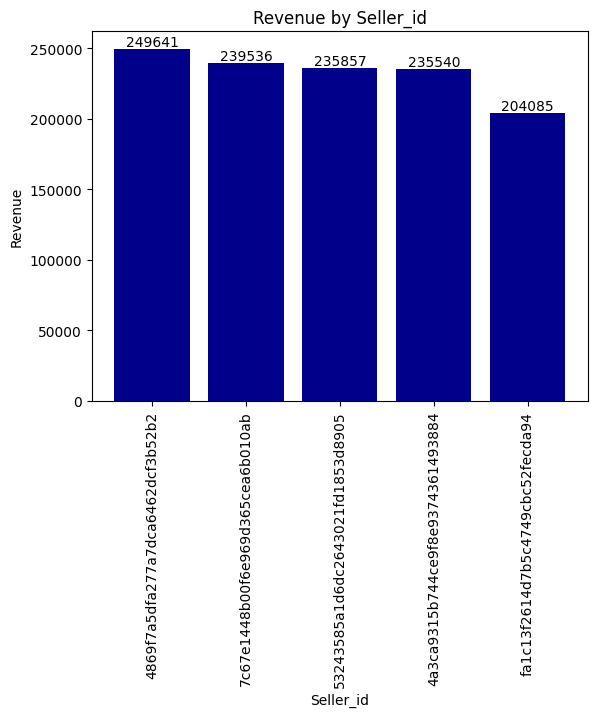

In [12]:
query = """ SELECT 
    seller_id,
    total_revenue,
    RANK() OVER (ORDER BY total_revenue DESC) AS revenue_rank
FROM (
    SELECT 
        oi.seller_id,
        ROUND(SUM(oi.price + oi.freight_value),2) AS total_revenue
    FROM 
        order_items oi
    GROUP BY 
        oi.seller_id
) AS sub """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data,columns =["Seller_id" , "Revenue" , "rank"])
df = df.head()
sns.barplot(x = "Seller_id", y = "Revenue", data = df)
o = plt.bar(df["Seller_id"],df["Revenue"],color = "darkblue")
plt.title("Revenue by Seller_id")
plt.bar_label(o)

plt.xticks ( rotation = 90)
plt.show()



# Calculate the moving average of order values for each customer over their order history. 

In [13]:
query = """ SELECT 
    customer_id,
    order_purchase_timestamp,
    payment,
    AVG(payment) OVER (
        PARTITION BY customer_id
        ORDER BY order_purchase_timestamp
        ROWS BETWEEN 2 PRECEDING AND CURRENT ROW
    ) AS mov_avg
FROM (
    SELECT 
        o.customer_id,
        o.order_purchase_timestamp,
        p.payment_value AS payment
    FROM 
        payments p
    JOIN orders o 
        ON p.order_id = o.order_id
) AS a
ORDER BY 
    customer_id, order_purchase_timestamp  """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns =["customer_id" , "order_purchase_timestamp" , "Payment","Mov_avg"])
df

,customer_id,order_purchase_timestamp,Payment,Mov_avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002
...,...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,71.23,27.120001
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.130001
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130005
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000


# Calculate the cumulative sales per month for each year. 

In [14]:
query = """ SELECT 
    YEAR(o.order_purchase_timestamp) AS year,
    MONTH(o.order_purchase_timestamp) AS month,
    ROUND(SUM(p.payment_value), 2) AS monthly_sales,
    ROUND(
        SUM(SUM(p.payment_value)) OVER (
            PARTITION BY YEAR(o.order_purchase_timestamp)
            ORDER BY MONTH(o.order_purchase_timestamp)
        ), 2
    ) AS cumulative_sales
FROM 
    payments p
JOIN 
    orders o ON p.order_id = o.order_id
GROUP BY 
    YEAR(o.order_purchase_timestamp),
    MONTH(o.order_purchase_timestamp)
ORDER BY 
    year, month """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns =["Year" , "Months" , "Payment","Cum_Sales"])
df

,Year,Months,Payment,Cum_Sales
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,138488.04
4,2017,2,291908.01,430396.05
5,2017,3,449863.60,880259.65
6,2017,4,417788.03,1298047.68
7,2017,5,592918.82,1890966.50
8,2017,6,511276.38,2402242.88
9,2017,7,592382.92,2994625.80


# Calculate the year-over-year growth rate of total sales. 

In [15]:
query = """ WITH yearly_sales AS (
    SELECT 
        YEAR(o.order_purchase_timestamp) AS year,
        SUM(p.payment_value) AS total_sales
    FROM 
        payments p
    JOIN 
        orders o ON p.order_id = o.order_id
    GROUP BY 
        YEAR(o.order_purchase_timestamp)
)
SELECT 
    year,
    ROUND(total_sales, 2) AS total_sales,
    ROUND(
        (total_sales - LAG(total_sales) OVER (ORDER BY year)) 
        / LAG(total_sales) OVER (ORDER BY year) * 100, 2
    ) AS yoy_growth_percent
FROM 
    yearly_sales
ORDER BY 
    year """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Years","Total_sales","YoY_growth_percent"])
df

,Years,Total_sales,YoY_growth_percent
0,2016,59362.34,NaN
1,2017,7249746.73,12112.7
2,2018,8699763.05,20.0


# Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase. 


In [16]:
query = """ WITH first_orders AS (
    SELECT 
        customer_id,
        MIN(order_purchase_timestamp) AS first_purchase
    FROM orders
    GROUP BY customer_id
),
repeat_customers AS (
    SELECT DISTINCT 
        o.customer_id
    FROM orders o
    JOIN first_orders f 
        ON o.customer_id = f.customer_id
       AND o.order_purchase_timestamp > f.first_purchase
       AND o.order_purchase_timestamp <= DATE_ADD(f.first_purchase, INTERVAL 6 MONTH)
)
SELECT 
    ROUND(COUNT(DISTINCT r.customer_id) * 100.0 / COUNT(DISTINCT f.customer_id), 2) 
    AS retention_rate_percentage
FROM 
    first_orders f
LEFT JOIN 
    repeat_customers r ON f.customer_id = r.customer_id """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Retention_rate_percentage"])
df

,Retention_rate_percentage
0,0.00


# Identify the top 3 customers who spent the most money in each year. 

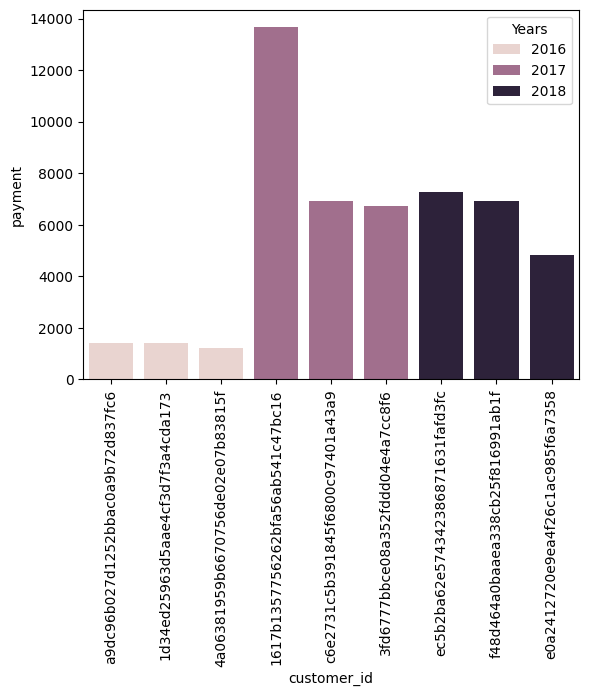

In [17]:
query = """ WITH yearly_customer_sales AS (
    SELECT 
        YEAR(o.order_purchase_timestamp) AS year,
        o.customer_id,
        SUM(p.payment_value) AS total_payment
    FROM 
        payments p
    JOIN orders o 
        ON p.order_id = o.order_id
    GROUP BY 
        YEAR(o.order_purchase_timestamp), o.customer_id
),
ranked_sales AS (
    SELECT 
        year,
        customer_id,
        ROUND(total_payment, 2) AS payment,
        RANK() OVER (
            PARTITION BY year 
            ORDER BY total_payment DESC
        ) AS d_rank
    FROM yearly_customer_sales
)
SELECT *
FROM ranked_sales
WHERE d_rank <= 3
ORDER BY year, d_rank """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Years","customer_id","payment","rank"])
sns.barplot(x ="customer_id", y = "payment", data = df, hue ="Years")
plt.xticks(rotation = 90)
plt.show()